# Predict whether customers' loan applications will be accepted.

### **Loan Prediction Dataset Description**

The dataset consists of 615 rows and 13 columns and is designed to help predict whether a customer's loan application will be approved or not. The dataset captures a range of applicant characteristics that are commonly considered by financial institutions when assessing loan eligibility.

#### **Columns/Features:**

1. **Loan_ID**: 
   - Unique identifier for each loan application.
   
2. **Gender**: 
   - Gender of the applicant (Male/Female).
   
3. **Married**: 
   - Whether the applicant is married (Yes/No).
   
4. **Dependents**: 
   - The number of dependents the applicant has (0, 1, 2, or 3+).
   
5. **Education**: 
   - Educational background of the applicant (Graduate/Not Graduate).
   
6. **Self_Employed**: 
   - Whether the applicant is self-employed (Yes/No).
   
7. **ApplicantIncome**: 
   - The income of the primary applicant (in monetary units).
   
8. **CoapplicantIncome**: 
   - The income of the co-applicant (if any).
   
9. **LoanAmount**: 
   - The loan amount requested by the applicant (in monetary units). This column contains some missing values.
   
10. **Loan_Amount_Term**: 
    - The term of the loan in months (e.g., 360 months, 180 months). There are some missing values in this column.
    
11. **Credit_History**: 
    - Whether the applicant has a history of credit repayment (1 = Yes, 0 = No). This column is important for assessing loan risk and has some missing values.
    
12. **Property_Area**: 
    - The type of area in which the property is located (Urban, Semi-Urban, Rural).
    
13. **Loan_Status**: 
    - The target variable. It indicates whether the loan was approved (Y = Yes) or not (N = No).

#### **Dataset Purpose:**

The dataset is primarily used for building predictive models to automate the loan eligibility process. The objective is to identify the factors that influence loan approval and develop a model that can classify customers into eligible or non-eligible segments. 



In [181]:
#import paskages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Explore Data

In [110]:
#load dataset 
df_loan=pd.read_csv("dataset/Loan_Predication.csv")

In [111]:
#head dataset 
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
#last dataset
df_loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [113]:
#shape of dataset
df_loan.shape

(614, 13)

In [114]:
# information about dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [115]:
# Summary statistics
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [116]:
# Check for missing values
print(df_loan.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<Axes: >

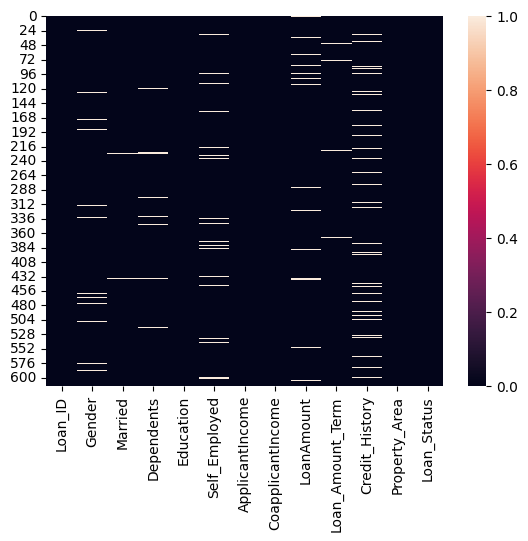

In [117]:
#visualize missing data
sns.heatmap(df_loan.isnull())

In [118]:
# dropeing  rows with missing values 

df_loan=df_loan.dropna()

In [119]:
# re Check for missing values
print(df_loan.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

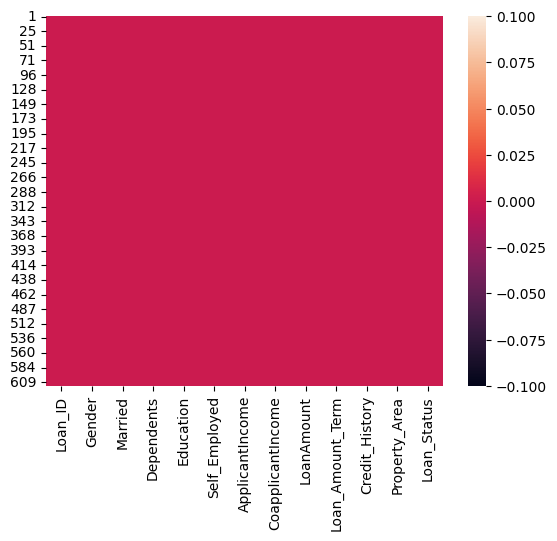

In [120]:
#visualize missing data
sns.heatmap(df_loan.isnull())

In [121]:
df_loan.shape

(480, 13)

data typr is columns "Dependents" object but dara is numrical ,so will show is columns and value_counts

In [122]:
#show column Dependents
df_loan[['Dependents']].sample(10)

,Dependents
394,2
66,0
594,0
389,0
54,1
443,1
71,2
603,0
28,0
608,0


In [123]:
#   count  unique value in  'Dependents' column.
df_loan.Dependents.value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

is problem it exist values "+3" ;so will replace it with number 4

In [124]:
#eplaces all occurrences of "+3" in the DataFrame with "4"
df_loan.replace(to_replace="3+",value='4',inplace=True)

In [125]:
#  re   count  unique value in  'Dependents' column.
df_loan.Dependents.value_counts()


0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Visalization Analysis

<Axes: xlabel='Gender', ylabel='count'>

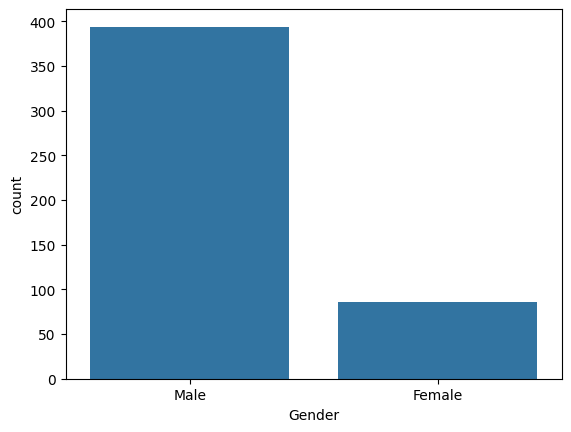

In [126]:
#Visalization to count column Gender
sns.countplot(data=df_loan , x='Gender')

<Axes: xlabel='Education', ylabel='count'>

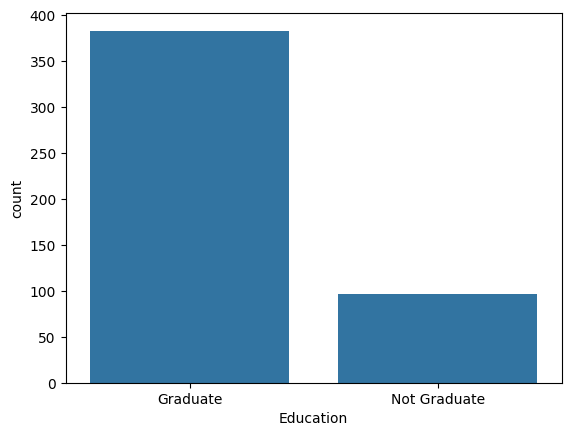

In [127]:
#Visalization to count column Education
sns.countplot(data=df_loan , x='Education')

Text(0.5, 1.0, 'Loan Status by Education Level')

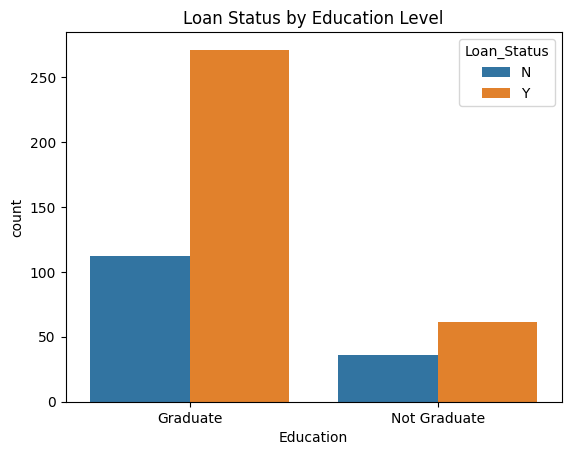

In [128]:
# distribution of Loan_Status based on the Education level 
sns.countplot(data=df_loan, x='Education', hue='Loan_Status')
plt.title('Loan Status by Education Level')

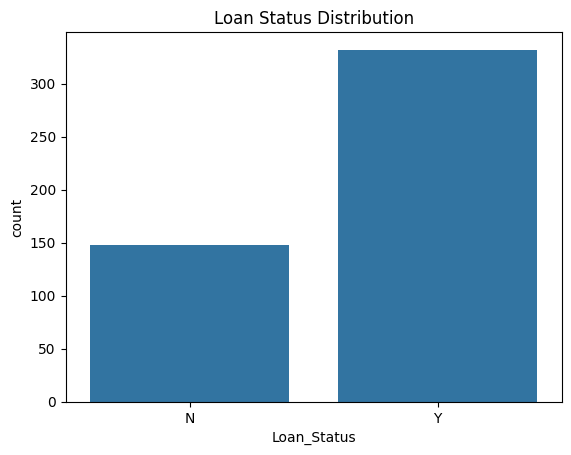

In [129]:
# Visualization of Loan Status distribution
sns.countplot(data=df_loan, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()


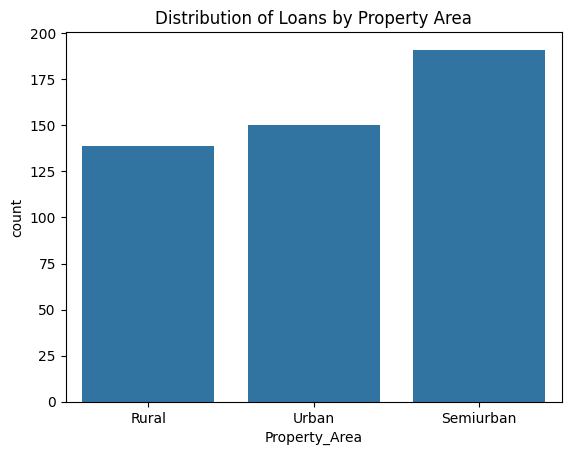

In [130]:
# Countplot for Property_Area distribution
sns.countplot(data=df_loan, x='Property_Area')
plt.title('Distribution of Loans by Property Area')
plt.show()

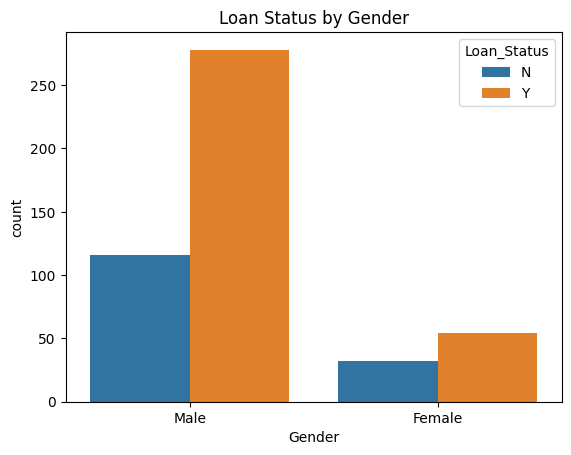

In [131]:
# Countplot for Loan Status by Gender
sns.countplot(data=df_loan, x='Gender', hue='Loan_Status')
plt.title('Loan Status by Gender')
plt.show()

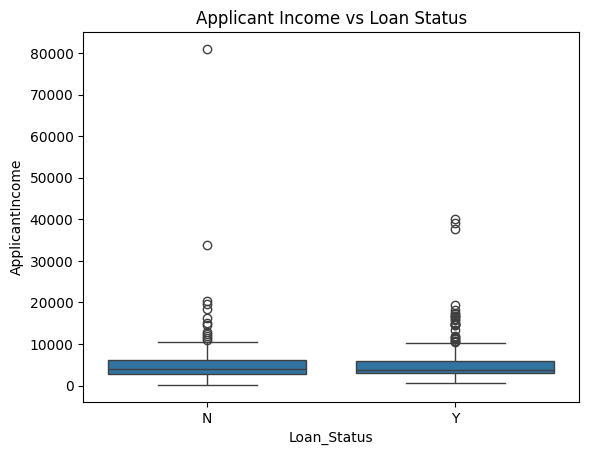

In [132]:
# Boxplot of ApplicantIncome by Loan Status
sns.boxplot(data=df_loan, x='Loan_Status', y='ApplicantIncome')
plt.title('Applicant Income vs Loan Status')
plt.show()

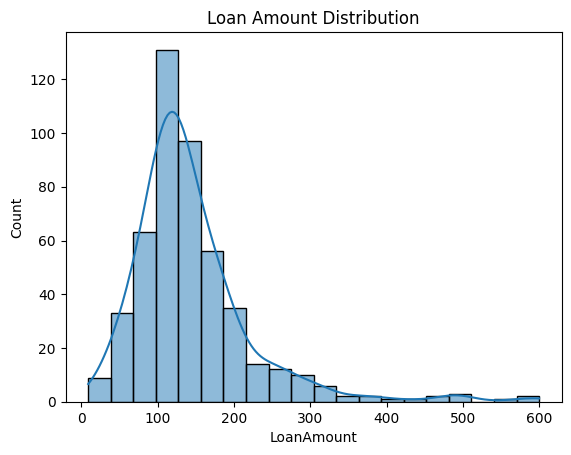

In [133]:
#Histogram of LoanAmount distribution
sns.histplot(df_loan['LoanAmount'], kde=True, bins=20)
plt.title('Loan Amount Distribution')
plt.show()

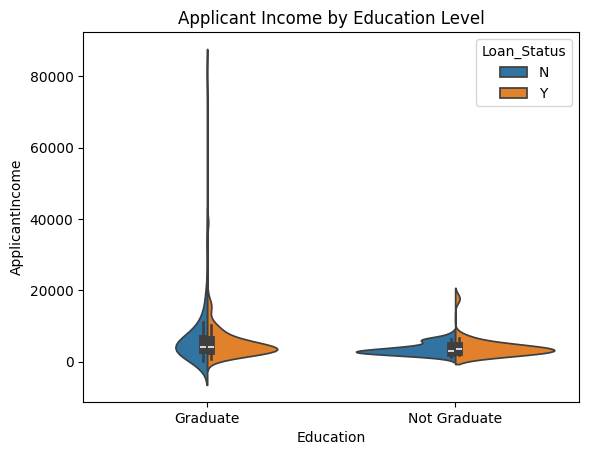

In [134]:
#. Violin plot of ApplicantIncome vs Education
sns.violinplot(data=df_loan, x='Education', y='ApplicantIncome', hue='Loan_Status', split=True)
plt.title('Applicant Income by Education Level')
plt.show()

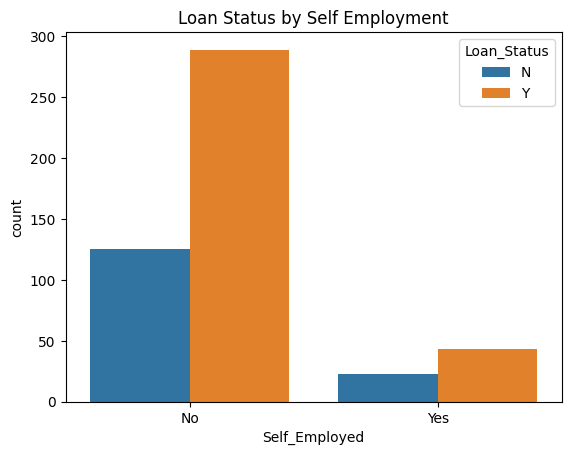

In [135]:
# Stacked bar chart for Loan Status by Self_Employed and Education
sns.countplot(data=df_loan, x='Self_Employed', hue='Loan_Status')
plt.title('Loan Status by Self Employment')
plt.show()

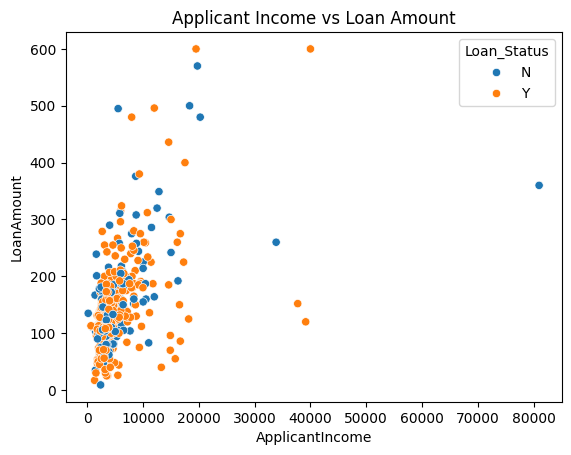

In [136]:
# Scatter plot of ApplicantIncome vs LoanAmount
sns.scatterplot(data=df_loan, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Applicant Income vs Loan Amount')
plt.show()

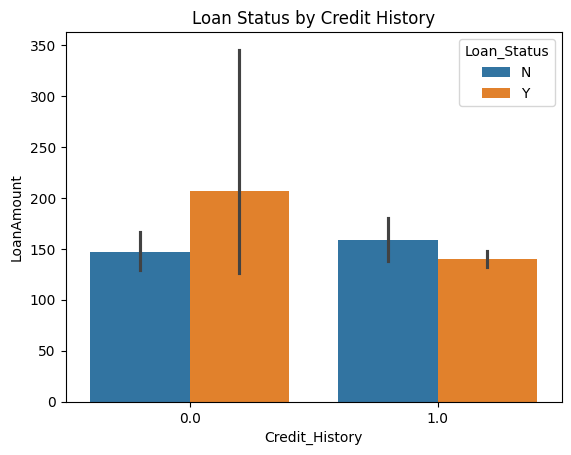

In [137]:
# Barplot for Credit History and Loan Status
sns.barplot(data=df_loan, x='Credit_History', y='LoanAmount', hue='Loan_Status')
plt.title('Loan Status by Credit History')
plt.show()

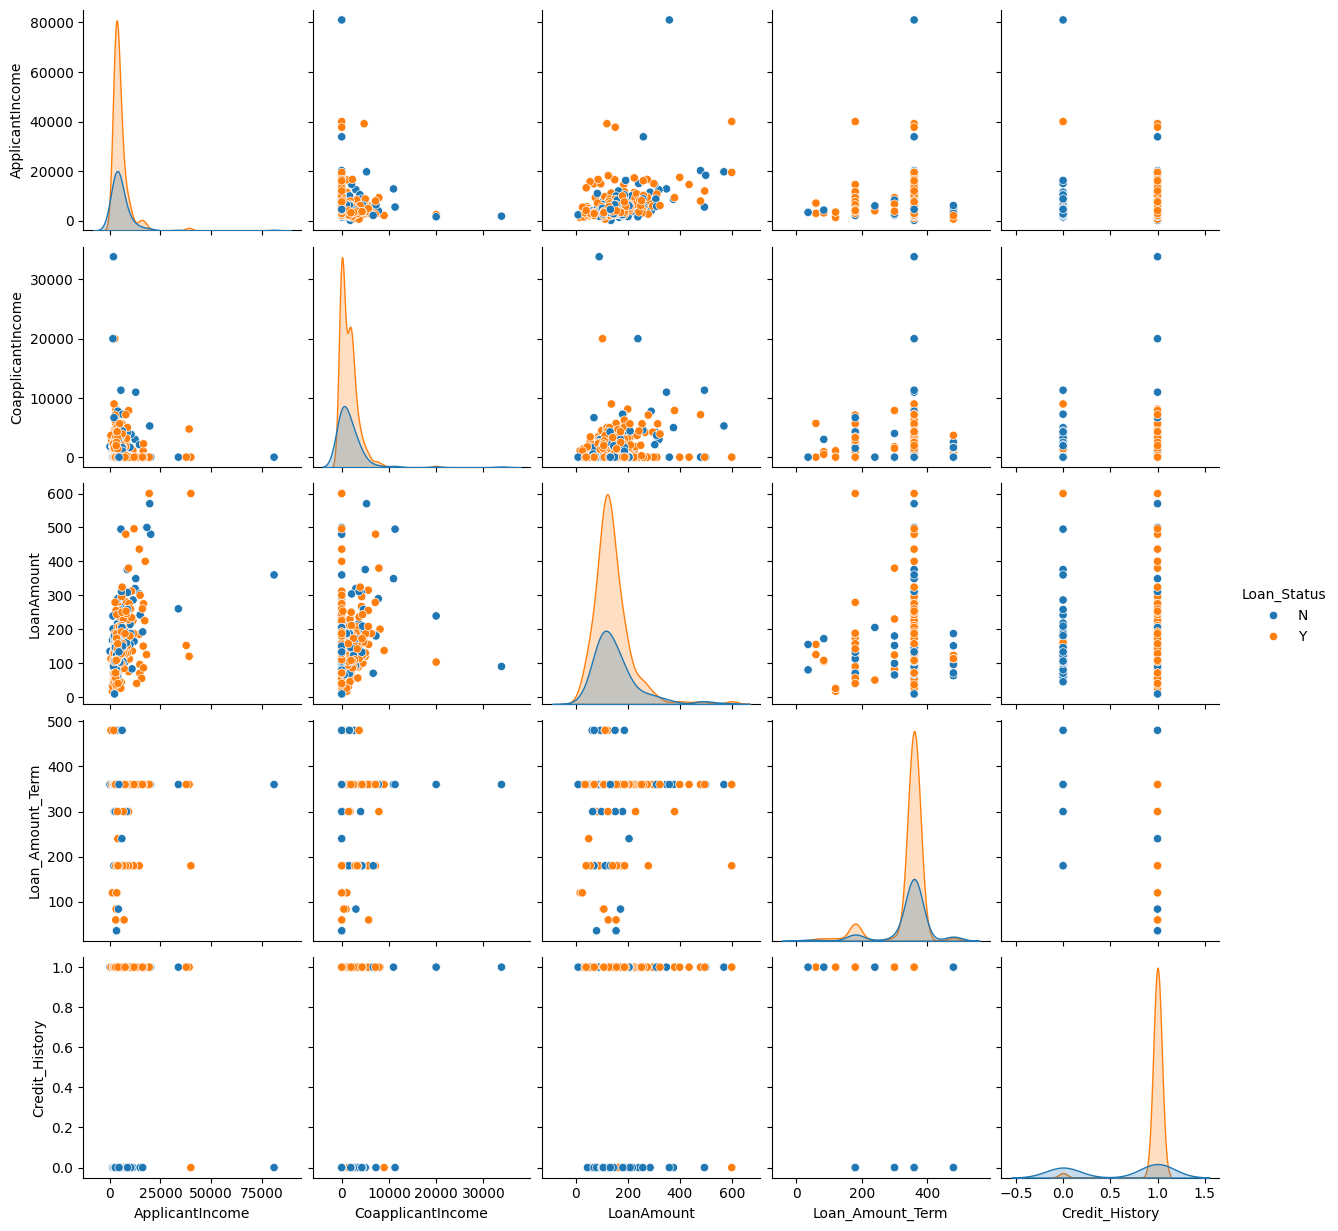

In [138]:
# Pairplot for numeric columns to see interactions
sns.pairplot(df_loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']], hue='Loan_Status')
plt.show()


### Preprossing data

In [140]:
#drop columns id 
df_loan=df_loan.drop(['Loan_ID'],axis=1)#drop id 


#### Tranfrome Data

In [154]:
# Replace 'Loan_Status' values: 'Y' with 1 and 'N' with 0 for binary encoding
df_loan.replace({"Loan_Status": {"Y": 1, "N": 0}}, inplace=True)


In [155]:
# Convert all categorical 'object' type columns to dummy/one-hot encoding
df_loan = pd.get_dummies(df_loan, columns=df_loan.select_dtypes(include=['object']).columns, drop_first=True)

In [156]:
#show data after transform
df_loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_4,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1


### Modeling

In [158]:
#separate features and target
x=df_loan.drop(['Loan_Status'],axis=1)#drop  target
y=df_loan.Loan_Status

In [173]:
# Split  data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)

In [174]:
# Check the shapes of the resulting datasets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (432, 14)
Testing set features shape: (48, 14)
Training set target shape: (432,)
Testing set target shape: (48,)


In [175]:
#create model SVC
model=SVC()

In [176]:
#train model
model.fit(X_train,y_train)

SVC()

In [177]:
#prediction model
prediction = model.predict(X_test)

In [179]:
#get score
accuracy=accuracy_score(prediction , y_test)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.7708333333333334


In [185]:
#  classification report
class_report = classification_report(y_test, prediction)
print(class_report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.77      1.00      0.87        37

    accuracy                           0.77        48
   macro avg       0.39      0.50      0.44        48
weighted avg       0.59      0.77      0.67        48



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
